<a href="https://colab.research.google.com/github/vijayalakshmish/Neural-Networks-Deep-Learning/blob/main/12_02_2025_cnn_two_different_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


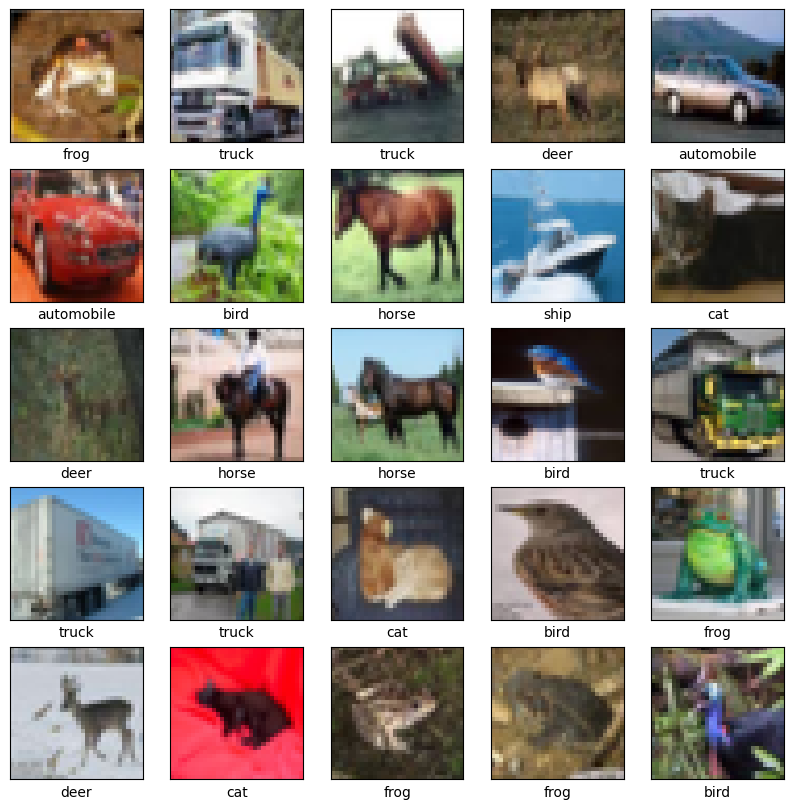

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 45ms/step - accuracy: 0.8121 - loss: 0.5342 - val_accuracy: 0.7176 - val_loss: 0.8720
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.8265 - loss: 0.4953 - val_accuracy: 0.7196 - val_loss: 0.8840
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.8383 - loss: 0.4583 - val_accuracy: 0.7060 - val_loss: 0.9494
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.8426 - loss: 0.4453 - val_accuracy: 0.7175 - val_loss: 0.9439
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.8572 - loss: 0.4006 - val_accuracy: 0.7167 - val_loss: 0.9470
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 43ms/step - accuracy: 0.8693 - loss: 0.3721 - val_accuracy: 0.7179 - val_loss: 0.9640
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.8736 - loss: 0.3570 - val_accuracy: 0.7075 - val_loss: 1.0249
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.8814 -

313/313 - 5s - 15ms/step - accuracy: 0.7098 - loss: 1.2054


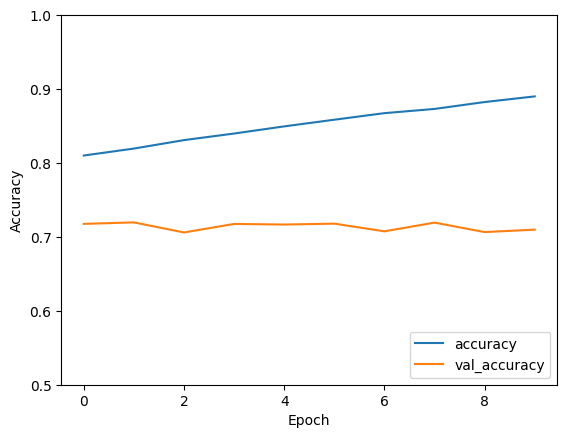

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [12]:
print(test_acc)

0.7098000049591064


In [13]:
#Fashion MNIST is a dataset of Zalando's article images—consisting of 70,000 grayscale images in 10 categories,
#just like MNIST but with images of clothing items rather than handwritten digits.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [14]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape the data to include a single color channel (grayscale)
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
# Define the CNN model
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the output and add fully connected layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output Layer with 10 classes (softmax activation)
    Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Train the model on the training data
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.7128 - loss: 0.7978 - val_accuracy: 0.8619 - val_loss: 0.3756
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.8550 - loss: 0.4013 - val_accuracy: 0.8806 - val_loss: 0.3275
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 56ms/step - accuracy: 0.8769 - loss: 0.3375 - val_accuracy: 0.8923 - val_loss: 0.2976
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 54ms/step - accuracy: 0.8870 - loss: 0.3073 - val_accuracy: 0.9004 - val_loss: 0.2823
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.8983 - loss: 0.2777 - val_accuracy: 0.9005 - val_loss: 0.2685
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9055 - loss: 0.2611 - val_accuracy: 0.9011 - val_loss: 0.2679
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.9100 - loss: 0.2453 - val_accuracy: 0.9072 - val_loss: 0.2573
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.9165 - loss: 0.2295 - 

In [19]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9110 - loss: 0.2549
Test Accuracy: 0.9093


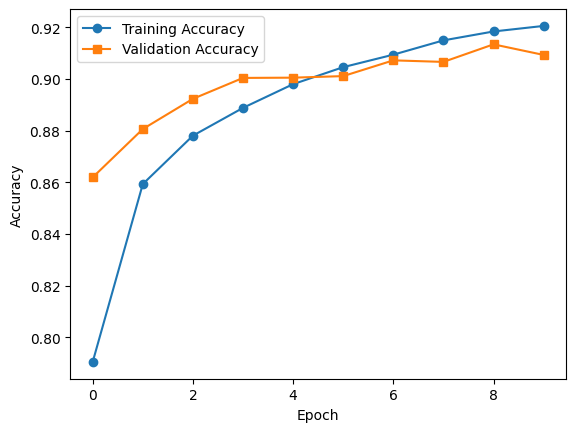

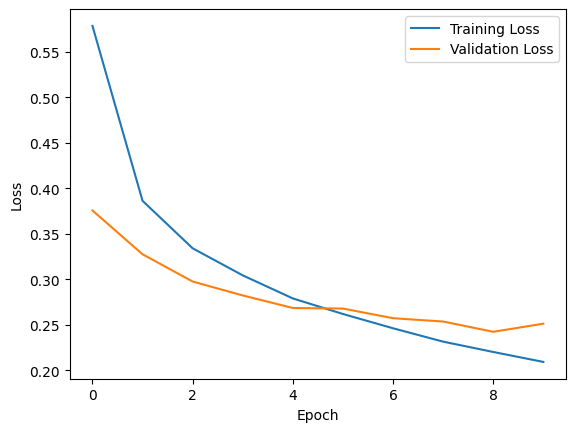

In [20]:
# Plot training and validation accuracy
#plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


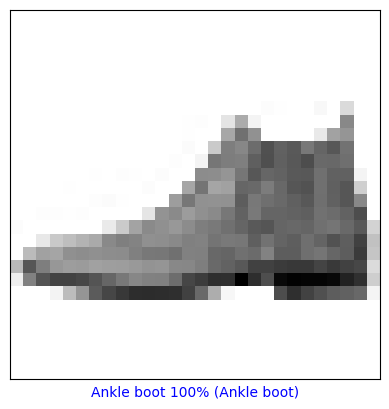

In [21]:
import matplotlib.pyplot as plt
import numpy as np
def plot_image(i, predictions_array, true_label, img):
  """Plots the image and prediction results."""
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary) # Reshape for grayscale image

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Assuming you have class names defined (replace with your actual class names)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# You need to get predictions first before calling plot_image
predictions = model.predict(x_test)  # Get predictions for your test data

# Now you can call plot_image
plot_image(0, predictions[0], np.argmax(y_test, axis=1), x_test)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


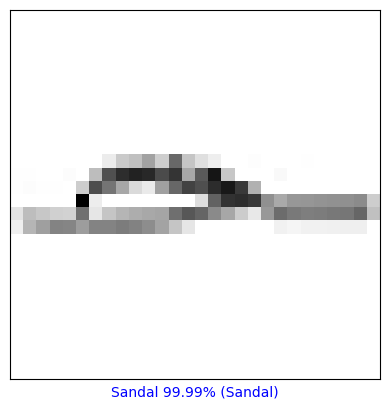

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plot_image(i, predictions_array, true_labels, img):
    """Plots the image and displays model predictions."""

    true_label = true_labels[i]
    img = img[i]

    plt.grid(False)  #Removes gridlines and axis ticks for a cleaner display
    plt.xticks([])
    plt.yticks([])

    # Show grayscale image
    plt.imshow(img, cmap=plt.cm.binary)

    # Get predicted label
    predicted_label = np.argmax(predictions_array[i])

    # Color the label: Blue (Correct), Red (Incorrect)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array[i]):.2f}% ({class_names[true_label]})",
               color=color)

# Define class names (Modify if necessary)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Generate predictions
predictions = model.predict(x_test)

# Plot the first test image with its prediction
plot_image(8, predictions, np.argmax(y_test, axis=1), x_test)
plt.show()